# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

### A simple app

In this notebook we build a very simple app that uses our exported model.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Note how we are not importing anything from our source code (we do not use any module from the ``src`` directory). This is because the exported model, differently from the model weights, is a standalone serialization of our model and therefore it does not need anything else. You can ship that file to anybody, and as long as they can import ``torch``, they will be able to use your model. This is very important for releasing pytorch models to production.

### Test your app
Go to a search engine for images (like Google Images) and search for images of some of the landmarks, like the Eiffel Tower, the Golden Gate Bridge, Machu Picchu and so on. Save a few examples locally, then upload them to your app to see how your model behaves!

The app will show the top 5 classes that the model think are most relevant for the picture you have uploaded

In [1]:
from ipywidgets import VBox, Button, FileUpload, Output, Label
from PIL import Image
from IPython.display import display
import io
import numpy as np
import torchvision
import torchvision.transforms as T
import torch

# Decide which model you want to use among the ones exported
learn_inf = torch.jit.load("checkpoints/original_exported.pt")

def on_click_classify(change):

    # Load image that has been uploaded
    fn = io.BytesIO(btn_upload.data[-1])

    img = Image.open(fn)
    img.load()

    # Let's clear the previous output (if any)
    out_pl.clear_output()

    # Display the image
    with out_pl:

        ratio = img.size[0] / img.size[1]
        c = img.copy()
        c.thumbnail([ratio * 200, 200])
        display(c)

    # Transform to tensor
    timg = T.ToTensor()(img).unsqueeze_(0)

    # Calling the model
    softmax = learn_inf(timg).data.cpu().numpy().squeeze()
    
    # Get the indexes of the classes ordered by softmax
    # (larger first)
    idxs = np.argsort(softmax)[::-1]
    
    # Loop over the classes with the largest softmax
    for i in range(5):
        # Get softmax value
        p = softmax[idxs[i]]
    
        # Get class name
        landmark_name = learn_inf.class_names[idxs[i]]
        
        labels[i].value = f"{landmark_name} (prob: {p:.2f})"


# Putting back btn_upload to a widget for next cell
btn_upload = FileUpload()

btn_run = Button(description="Classify")
btn_run.on_click(on_click_classify)

labels = []
for _ in range(5):
    labels.append(Label())

out_pl = Output()
out_pl.clear_output()

wgs = [Label("Please upload a picture of a landmark"), btn_upload, btn_run, out_pl]
wgs.extend(labels)

VBox(wgs)

In [2]:
!pip install -r requirements.txt 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 62.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 75.6 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 75.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 66.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.3 MB/s eta 0:00:01


  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=e480cc618ffda2f9ec9af8b2af545c697c532eec5537ab7a1f8384b865482761
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


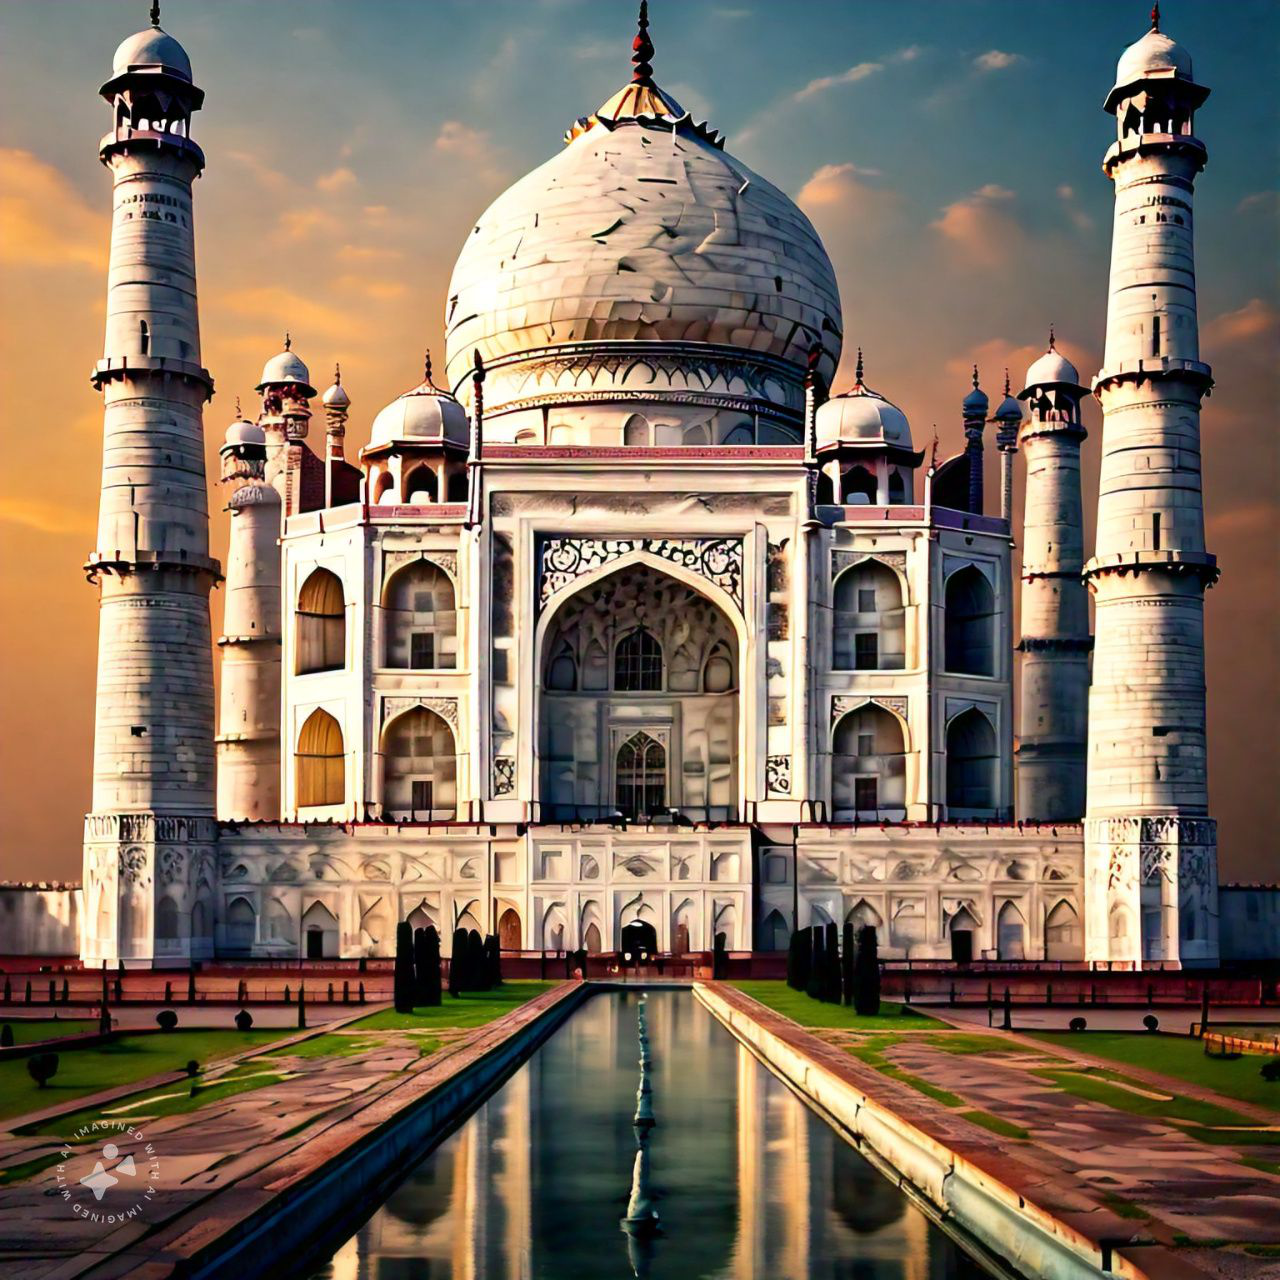

40.Stockholm_City_Hall: Probability - 0.39
15.Central_Park: Probability - 0.23
10.Edinburgh_Castle: Probability - 0.10
19.Vienna_City_Hall: Probability - 0.07
12.Kantanagar_Temple: Probability - 0.06


In [2]:
from ipywidgets import VBox, Button, Output, Label
from PIL import Image
from IPython.display import display
import numpy as np
import torchvision.transforms as T
import torch

# Path to your image file
image_path = "taj_mahal.jpg"  # Replace with your actual file path

# Load the model (example, replace with your actual model loading code)
learn_inf = torch.jit.load("checkpoints/transfer_exported.pt")

def classify_image(image_path):
    # Load image
    img = Image.open(image_path)
    
    # Display the image
    display(img)
    
    # Transform to tensor
    timg = T.ToTensor()(img).unsqueeze_(0)
    
    # Calling the model
    softmax = learn_inf(timg).data.cpu().numpy().squeeze()
    
    # Get the indexes of the classes ordered by softmax
    idxs = np.argsort(softmax)[::-1]
    
    # Display top 5 classifications
    for i in range(5):
        p = softmax[idxs[i]]  # Probability
        landmark_name = learn_inf.class_names[idxs[i]]  # Landmark name
        print(f"{landmark_name}: Probability - {p:.2f}")

# Call the classification function with your image path
classify_image(image_path)


## (optional) Standalone app or web app

You can run this notebook as a standalone app on your computer by following these steps:

1. Download this notebook in a directory on your machine
2. Download the model export (for example, ``checkpoints/transfer_exported.pt``) in a subdirectory called ``checkpoints`` within the directory where you save the app.ipynb notebook
3. Install voila if you don't have it already (``pip install voila``)
4. Run your app: ``voila app.ipynb --show_tracebacks=True``
5. Customize your notebook to make your app prettier and rerun voila

You can also deploy this app as a website using Binder: https://voila.readthedocs.io/en/stable/deploy.html#deployment-on-binder

# Create your submission archive

Now that you are done with your project, please run the following cell. It will generate a file containing all the code you have written, as well as the notebooks. Please submit that file to complete your project

In [3]:
!python src/create_submit_pkg.py

executing: jupyter nbconvert --to html cnn_from_scratch.ipynb
[NbConvertApp] Converting notebook cnn_from_scratch.ipynb to html
[NbConvertApp] Writing 1207911 bytes to cnn_from_scratch.html
executing: jupyter nbconvert --to html transfer_learning.ipynb
[NbConvertApp] Converting notebook transfer_learning.ipynb to html
[NbConvertApp] Writing 421932 bytes to transfer_learning.html
executing: jupyter nbconvert --to html app.ipynb
[NbConvertApp] Converting notebook app.ipynb to html
[NbConvertApp] Writing 284847 bytes to app.html
Adding files to submission_2024-07-13T18h22m.tar.gz
src/helpers.py
src/create_submit_pkg.py
src/model.py
src/train.py
src/data.py
src/optimization.py
src/transfer.py
src/__init__.py
src/predictor.py
cnn_from_scratch.ipynb
transfer_learning.ipynb
app.ipynb
app.html
cnn_from_scratch.html
transfer_learning.html

----------------------------------------------------------------
Done. Please submit the file submission_2024-07-13T18h22m.tar.gz
---------------------------